In [109]:
import pandas as pd
import numpy as np
import hvplot.pandas as hvplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import seaborn as sn


In [110]:
# Read in the team defense data
team_def_2021_df = pd.read_csv(
    'Resources/2021_team_defense.csv',
    header=1,
)
# Remove the average rows at the bottom of the data frame
team_def_2021_df = team_def_2021_df.loc[0:31]

# Drop Rank column
team_def_2021_df.drop('Rk', axis=1, inplace=True)

# Sort the data frame by team
team_def_2021_df_sorted = team_def_2021_df.sort_values('Tm')

# Reset the index of the data frame
team_def_2021_df_sorted = team_def_2021_df_sorted.reset_index()

# Drop the index column that was created
team_def_2021_df_sorted.drop('index', axis=1, inplace=True)

# Drop the games column
team_def_2021_df_sorted.drop('G', axis=1, inplace=True)

# Display the sorted data frame
team_def_2021_df_sorted

,Tm,PA,Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,Arizona Cardinals,366.0,5597.0,1028.0,5.4,27.0,14.0,336.0,367.0,561.0,...,1952.0,10.0,4.6,109.0,100.0,896,35.0,35.6,15.3,-19.46
1,Atlanta Falcons,459.0,6194.0,1114.0,5.6,20.0,8.0,383.0,391.0,577.0,...,2242.0,19.0,4.3,143.0,118.0,956,26.0,44.7,11.2,-136.74
2,Baltimore Ravens,392.0,6178.0,1033.0,6.0,15.0,6.0,340.0,397.0,621.0,...,1436.0,13.0,3.8,81.0,98.0,882,27.0,34.2,7.9,-107.49
3,Buffalo Bills,289.0,4637.0,1014.0,4.6,30.0,11.0,285.0,297.0,530.0,...,1866.0,19.0,4.2,108.0,102.0,844,39.0,28.0,14.5,36.13
4,Carolina Panthers,404.0,5201.0,1028.0,5.1,16.0,7.0,311.0,337.0,515.0,...,1935.0,16.0,4.1,112.0,108.0,896,29.0,37.6,8.1,-9.14
5,Chicago Bears,407.0,5384.0,1009.0,5.3,16.0,8.0,321.0,314.0,477.0,...,2127.0,14.0,4.4,116.0,93.0,856,35.0,40.4,8.4,-77.49
6,Cincinnati Bengals,376.0,5964.0,1075.0,5.5,21.0,8.0,339.0,420.0,626.0,...,1742.0,15.0,4.3,107.0,116.0,946,19.0,33.9,11.1,-45.38
7,Cleveland Browns,371.0,5296.0,1056.0,5.0,19.0,6.0,327.0,367.0,576.0,...,1857.0,13.0,4.2,108.0,98.0,882,35.0,37.4,9.9,-54.54
8,Dallas Cowboys,358.0,5967.0,1082.0,5.5,34.0,8.0,327.0,364.0,612.0,...,1918.0,13.0,4.5,99.0,121.0,973,37.0,32.5,16.7,21.81
9,Denver Broncos,322.0,5544.0,1039.0,5.3,19.0,6.0,312.0,341.0,562.0,...,1892.0,9.0,4.3,99.0,104.0,922,21.0,32.7,10.7,-36.14


<AxesSubplot:>

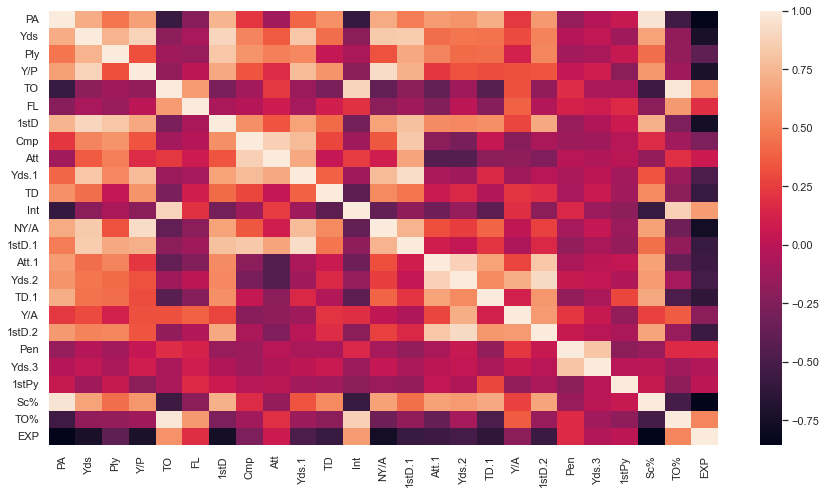

In [143]:
corr_matrix = team_def_2021_df_sorted.corr()
sn.set(rc={"figure.figsize":(15,8)})
sn.heatmap(corr_matrix)

In [111]:
# Check the data types of the columns
team_def_2021_df_sorted.dtypes

Tm         object
PA        float64
Yds       float64
Ply       float64
Y/P       float64
TO        float64
FL        float64
1stD      float64
Cmp       float64
Att       float64
Yds.1     float64
TD        float64
Int       float64
NY/A      float64
1stD.1    float64
Att.1     float64
Yds.2     float64
TD.1      float64
Y/A       float64
1stD.2    float64
Pen       float64
Yds.3       int64
1stPy     float64
Sc%       float64
TO%       float64
EXP       float64
dtype: object

In [112]:
team_def_2021_df_sorted.columns

Index(['Tm', 'PA', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att',
       'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1', 'Y/A',
       '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP'],
      dtype='object')

In [113]:
# Read in the advance defensive stats csv file
advanced_def_2021_df = pd.read_csv(
    'Resources/2021_adv_def.csv'
)
# Sort the new advanced defense data frame, reset and clean up the index, rename the team name column for differentiation later on
advanced_def_2021_df_sorted = advanced_def_2021_df.sort_values('Tm')

# Reset the index
advanced_def_2021_df_sorted.reset_index(inplace=True)

# Drop the new index column that was created
advanced_def_2021_df_sorted.drop('index', axis=1, inplace=True)

# Rename the team name column to differentiate when using concat later
advanced_def_2021_df_sorted.rename(columns={'Tm':'Tm2'}, inplace=True)

# Change the dtype of the object columns
advanced_def_2021_df_sorted['Bltz%'] = advanced_def_2021_df_sorted['Bltz%'].str.replace('%','').astype(np.float64)
advanced_def_2021_df_sorted['Hrry%'] = advanced_def_2021_df_sorted['Hrry%'].str.replace('%','').astype(np.float64)
advanced_def_2021_df_sorted['QBKD%'] = advanced_def_2021_df_sorted['QBKD%'].str.replace('%','').astype(np.float64)
advanced_def_2021_df_sorted['Prss%'] = advanced_def_2021_df_sorted['Prss%'].str.replace('%','').astype(np.float64)

# Drop the games column
advanced_def_2021_df_sorted.drop('G', axis=1, inplace=True)

# Display the advanced defensive stats data frame
display(advanced_def_2021_df_sorted)

,Tm2,Att,Cmp,Yds,TD,DADOT,Air,YAC,Bltz,Bltz%,Hrry,Hrry%,QBKD,QBKD%,Sk,Prss,Prss%,MTkl
0,Arizona Cardinals,561,367,3645,30,7.4,2317,1784,210,33.6,61,9.8,60,10.7,41,162,25.9,110
1,Atlanta Falcons,577,391,3952,31,7.3,2143,1905,154,24.5,48,7.6,39,6.8,18,105,16.7,120
2,Baltimore Ravens,621,397,4742,31,8.4,2500,2467,209,31.1,58,8.6,62,10.0,34,154,23.0,115
3,Buffalo Bills,530,297,2771,12,7.0,1724,1916,157,26.0,93,15.4,51,9.6,42,186,30.8,118
4,Carolina Panthers,515,337,3266,26,7.8,1957,1602,192,33.7,62,10.9,48,9.3,39,149,26.1,106
5,Chicago Bears,477,314,3257,31,8.0,1934,1685,123,22.6,46,8.4,31,6.5,49,126,23.1,106
6,Cincinnati Bengals,626,420,4222,26,8.1,3118,2455,142,20.5,75,10.8,53,8.5,42,170,24.5,108
7,Cleveland Browns,576,367,3439,29,7.4,1800,1912,141,22.1,59,9.3,53,9.2,43,155,24.3,118
8,Dallas Cowboys,612,364,4049,24,8.0,2131,2364,184,27.1,79,11.6,68,11.1,41,188,27.6,106
9,Denver Broncos,562,341,3652,22,8.3,1994,1907,160,25.3,83,13.1,45,8.0,36,164,25.9,84


In [114]:
# Check the dtypes of the advanced def stats data frame
advanced_def_2021_df_sorted.dtypes

Tm2       object
Att        int64
Cmp        int64
Yds        int64
TD         int64
DADOT    float64
Air        int64
YAC        int64
Bltz       int64
Bltz%    float64
Hrry       int64
Hrry%    float64
QBKD       int64
QBKD%    float64
Sk         int64
Prss       int64
Prss%    float64
MTkl       int64
dtype: object

In [115]:
# Join the defensive data frames
all_def_stats_2021_df = pd.concat((advanced_def_2021_df_sorted, team_def_2021_df_sorted), axis=1)

# Remove the duplicate team category
all_def_stats_2021_df.drop('Tm', axis=1, inplace=True)

# Review the defensive stats data frame
display(all_def_stats_2021_df)

,Tm2,Att,Cmp,Yds,TD,DADOT,Air,YAC,Bltz,Bltz%,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,Arizona Cardinals,561,367,3645,30,7.4,2317,1784,210,33.6,...,1952.0,10.0,4.6,109.0,100.0,896,35.0,35.6,15.3,-19.46
1,Atlanta Falcons,577,391,3952,31,7.3,2143,1905,154,24.5,...,2242.0,19.0,4.3,143.0,118.0,956,26.0,44.7,11.2,-136.74
2,Baltimore Ravens,621,397,4742,31,8.4,2500,2467,209,31.1,...,1436.0,13.0,3.8,81.0,98.0,882,27.0,34.2,7.9,-107.49
3,Buffalo Bills,530,297,2771,12,7.0,1724,1916,157,26.0,...,1866.0,19.0,4.2,108.0,102.0,844,39.0,28.0,14.5,36.13
4,Carolina Panthers,515,337,3266,26,7.8,1957,1602,192,33.7,...,1935.0,16.0,4.1,112.0,108.0,896,29.0,37.6,8.1,-9.14
5,Chicago Bears,477,314,3257,31,8.0,1934,1685,123,22.6,...,2127.0,14.0,4.4,116.0,93.0,856,35.0,40.4,8.4,-77.49
6,Cincinnati Bengals,626,420,4222,26,8.1,3118,2455,142,20.5,...,1742.0,15.0,4.3,107.0,116.0,946,19.0,33.9,11.1,-45.38
7,Cleveland Browns,576,367,3439,29,7.4,1800,1912,141,22.1,...,1857.0,13.0,4.2,108.0,98.0,882,35.0,37.4,9.9,-54.54
8,Dallas Cowboys,612,364,4049,24,8.0,2131,2364,184,27.1,...,1918.0,13.0,4.5,99.0,121.0,973,37.0,32.5,16.7,21.81
9,Denver Broncos,562,341,3652,22,8.3,1994,1907,160,25.3,...,1892.0,9.0,4.3,99.0,104.0,922,21.0,32.7,10.7,-36.14


In [116]:
# Check the columns in the data frame
all_def_stats_2021_df.columns

Index(['Tm2', 'Att', 'Cmp', 'Yds', 'TD', 'DADOT', 'Air', 'YAC', 'Bltz',
       'Bltz%', 'Hrry', 'Hrry%', 'QBKD', 'QBKD%', 'Sk', 'Prss', 'Prss%',
       'MTkl', 'PA', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att',
       'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1', 'Y/A',
       '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP'],
      dtype='object')

In [117]:
# Read in the AFC standings csv
afc_standings_df = pd.read_csv(
    'Resources/afc_2021.csv'
)
# Remove the playoff indicators from the team names
afc_standings_df['Tm'] = afc_standings_df['Tm'].str.replace('[+,*]','')

# Review the AFC standings
display(afc_standings_df)

c:\Users\qstro\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Buffalo Bills,11,6,0,0.647,483,289,194,11.4,-1.6,9.8,5.0,4.8
1,New England Patriots,10,7,0,0.588,462,303,159,9.4,-0.9,8.5,3.6,4.8
2,Miami Dolphins,9,8,0,0.529,341,373,-32,-1.9,-0.8,-2.7,-3.1,0.3
3,New York Jets,4,13,0,0.235,310,504,-194,-11.4,1.0,-10.4,-3.6,-6.7
4,Cincinnati Bengals,10,7,0,0.588,460,376,84,4.9,-1.9,3.1,3.4,-0.3
5,Pittsburgh Steelers,9,7,1,0.559,343,398,-55,-3.2,0.8,-2.5,-2.6,0.1
6,Cleveland Browns,8,9,0,0.471,349,371,-22,-1.3,0.0,-1.3,-2.7,1.3
7,Baltimore Ravens,8,9,0,0.471,387,392,-5,-0.3,0.0,-0.3,-0.3,0.0
8,Tennessee Titans,12,5,0,0.706,419,354,65,3.8,-0.4,3.4,1.8,1.6
9,Indianapolis Colts,9,8,0,0.529,451,365,86,5.1,-0.6,4.4,3.3,1.1


In [118]:
# Check the dtypes of the afc standings data frame
afc_standings_df.dtypes

Tm       object
W         int64
L         int64
T         int64
W-L%    float64
PF        int64
PA        int64
PD        int64
MoV     float64
SoS     float64
SRS     float64
OSRS    float64
DSRS    float64
dtype: object

In [119]:
# Read in the NFC standings csv
nfc_standings_df = pd.read_csv(
    'Resources/nfc_2021.csv'
)
# Remove the playoff indicators from the team names
nfc_standings_df['Tm'] = nfc_standings_df['Tm'].str.replace('[*,+]','')

# Review the NFC standings
nfc_standings_df

c:\Users\qstro\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Dallas Cowboys,12,5,0,0.706,530,358,172,10.1,-0.2,9.9,8.2,1.7
1,Philadelphia Eagles,9,8,0,0.529,444,385,59,3.5,-1.0,2.5,2.6,-0.1
2,Washington Football Team,7,10,0,0.412,335,434,-99,-5.8,1.6,-4.2,-2.7,-1.5
3,New York Giants,4,13,0,0.235,258,416,-158,-9.3,1.0,-8.3,-7.7,-0.6
4,Green Bay Packers,13,4,0,0.765,450,371,79,4.6,-0.2,4.4,3.5,1.0
5,Minnesota Vikings,8,9,0,0.471,425,426,-1,-0.1,0.3,0.3,1.9,-1.6
6,Chicago Bears,6,11,0,0.353,311,407,-96,-5.6,0.5,-5.2,-4.9,-0.3
7,Detroit Lions,3,13,1,0.206,325,467,-142,-8.4,0.6,-7.8,-3.5,-4.3
8,Tampa Bay Buccaneers,13,4,0,0.765,511,353,158,9.3,-0.7,8.6,7.3,1.3
9,New Orleans Saints,9,8,0,0.529,364,335,29,1.7,0.3,2.0,-1.5,3.6


In [120]:
# Check the NFC standings dtypes
nfc_standings_df.dtypes

Tm       object
W         int64
L         int64
T         int64
W-L%    float64
PF        int64
PA        int64
PD        int64
MoV     float64
SoS     float64
SRS     float64
OSRS    float64
DSRS    float64
dtype: object

In [121]:
# Combine the NFC & AFC data frames
nfl_standings_2021 = pd.concat((afc_standings_df,nfc_standings_df),axis=0)

# Sort the standings by the wins column
nfl_standings_2021.sort_values('Tm', ascending=True, inplace=True)

# Reset the index of the data frame
nfl_standings_2021 = nfl_standings_2021.reset_index()

# Drop the index column
nfl_standings_2021 = nfl_standings_2021.drop('index', axis=1)

# Change team name column to differentiate when concatenating
nfl_standings_2021.rename(columns={'Tm':'Tm5'}, inplace=True)

# Review the NFL standings data frame
display(nfl_standings_2021)

,Tm5,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Arizona Cardinals,11,6,0,0.647,449,366,83,4.9,0.3,5.2,3.6,1.6
1,Atlanta Falcons,7,10,0,0.412,313,459,-146,-8.6,0.1,-8.5,-4.2,-4.3
2,Baltimore Ravens,8,9,0,0.471,387,392,-5,-0.3,0.0,-0.3,-0.3,0.0
3,Buffalo Bills,11,6,0,0.647,483,289,194,11.4,-1.6,9.8,5.0,4.8
4,Carolina Panthers,5,12,0,0.294,304,404,-100,-5.9,0.4,-5.5,-5.0,-0.5
5,Chicago Bears,6,11,0,0.353,311,407,-96,-5.6,0.5,-5.2,-4.9,-0.3
6,Cincinnati Bengals,10,7,0,0.588,460,376,84,4.9,-1.9,3.1,3.4,-0.3
7,Cleveland Browns,8,9,0,0.471,349,371,-22,-1.3,0.0,-1.3,-2.7,1.3
8,Dallas Cowboys,12,5,0,0.706,530,358,172,10.1,-0.2,9.9,8.2,1.7
9,Denver Broncos,7,10,0,0.412,335,322,13,0.8,-1.3,-0.5,-4.7,4.2


In [122]:
# Read in the team offense stats csv file
team_off_2021 = pd.read_csv(
    'Resources/2021_team_offense.csv',
    header=1
)
# Remove the average rows from the bottom of the data frame
team_off_2021 = team_off_2021.loc[0:31]

# Sort the data frame alphabetically
team_off_2021_sorted = team_off_2021.sort_values('Tm')

# Drop the Rk column
team_off_2021_sorted.drop('Rk', axis=1, inplace=True)

# Reset the index 
team_off_2021_sorted.reset_index(inplace=True)

# Remove the index that was created by resetting the index
team_off_2021_sorted.drop('index', axis=1, inplace=True)

# Change team name column to differentiate when concatenating
team_off_2021_sorted.rename(columns={'Tm':'Tm3'}, inplace=True)

# Drop the games column
team_off_2021_sorted.drop('G', axis=1, inplace=True)

# Display the clean data frame
display(team_off_2021_sorted)

,Tm3,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,...,Yds.2,TD.1,Y/A,1stD.2,Pen,Yds.3,1stPy,Sc%,TO%,EXP
0,Arizona Cardinals,449.0,6352.0,1126.0,5.6,15.0,4.0,367.0,415.0,591.0,...,2076.0,23.0,4.2,127.0,114.0,990,26.0,44.7,7.8,119.94
1,Atlanta Falcons,313.0,5164.0,1006.0,5.1,26.0,11.0,306.0,377.0,573.0,...,1451.0,11.0,3.7,75.0,92.0,753,35.0,32.8,14.7,-18.38
2,Baltimore Ravens,387.0,6440.0,1185.0,5.4,26.0,8.0,394.0,396.0,611.0,...,2479.0,18.0,4.8,159.0,102.0,852,26.0,38.5,13.3,59.67
3,Buffalo Bills,483.0,6493.0,1143.0,5.7,22.0,6.0,398.0,415.0,655.0,...,2209.0,20.0,4.8,134.0,113.0,980,28.0,45.2,11.3,216.68
4,Carolina Panthers,304.0,5081.0,1106.0,4.6,29.0,8.0,322.0,348.0,599.0,...,1842.0,17.0,4.0,118.0,107.0,864,30.0,29.2,14.9,-92.10
5,Chicago Bears,311.0,5225.0,1075.0,4.9,29.0,9.0,333.0,332.0,542.0,...,2018.0,14.0,4.2,119.0,106.0,914,34.0,31.5,15.2,-40.89
6,Cincinnati Bengals,460.0,6145.0,1046.0,5.9,21.0,7.0,337.0,384.0,555.0,...,1742.0,16.0,4.0,96.0,72.0,620,33.0,42.6,10.0,118.50
7,Cleveland Browns,349.0,5791.0,1054.0,5.5,22.0,8.0,342.0,320.0,520.0,...,2471.0,20.0,5.1,138.0,112.0,1035,27.0,32.2,12.4,58.49
8,Dallas Cowboys,530.0,6919.0,1153.0,6.0,20.0,9.0,390.0,444.0,647.0,...,2119.0,15.0,4.5,111.0,127.0,1103,31.0,43.8,9.9,158.06
9,Denver Broncos,335.0,5618.0,1036.0,5.4,18.0,9.0,331.0,354.0,541.0,...,2025.0,16.0,4.5,124.0,83.0,711,28.0,36.9,9.5,61.32


In [123]:
team_off_2021_sorted.dtypes

Tm3        object
PF        float64
Yds       float64
Ply       float64
Y/P       float64
TO        float64
FL        float64
1stD      float64
Cmp       float64
Att       float64
Yds.1     float64
TD        float64
Int       float64
NY/A      float64
1stD.1    float64
Att.1     float64
Yds.2     float64
TD.1      float64
Y/A       float64
1stD.2    float64
Pen       float64
Yds.3       int64
1stPy     float64
Sc%       float64
TO%       float64
EXP       float64
dtype: object

In [124]:
# Read in the offensive conversions data base
off_conversions_2021 = pd.read_csv(
    'Resources/off_conversions_2021.csv',
    header=1
)
# Remove the average rows from the bottom of the data frame
off_conversions_2021 = off_conversions_2021.loc[0:31]

# Sort the data frame alphabetically
off_conversions_2021_sorted = off_conversions_2021.sort_values('Tm')

# Reset the index of the data frame
off_conversions_2021_sorted.reset_index(inplace=True)

# Drop the index column that was created 
off_conversions_2021_sorted.drop('index', axis=1, inplace=True)

# Drop the rank column from the beginning of the data frame
off_conversions_2021_sorted.drop('Rk', axis=1, inplace=True)

# Change team name column to differentiate when concatenating
off_conversions_2021_sorted.rename(columns={'Tm':'Tm4'}, inplace=True)

# Drop the games column
off_conversions_2021_sorted.drop('G', axis=1, inplace=True)

# Remove the percentage and convert the dtypes to floats
off_conversions_2021_sorted['3D%'] = off_conversions_2021_sorted['3D%'].str.replace('%','').astype(np.float64)
off_conversions_2021_sorted['4D%'] = off_conversions_2021_sorted['4D%'].str.replace('%','').astype(np.float64)
off_conversions_2021_sorted['RZPct'] = off_conversions_2021_sorted['RZPct'].str.replace('%','').astype(np.float64)

# Displat the clean offensive conversions data frame
display(off_conversions_2021_sorted)

,Tm4,3DAtt,3DConv,3D%,4DAtt,4DConv,4D%,RZAtt,RZTD,RZPct
0,Arizona Cardinals,221.0,100.0,45.2,29.0,17.0,58.6,65.0,39.0,60.0
1,Atlanta Falcons,211.0,82.0,38.9,24.0,10.0,41.7,54.0,29.0,53.7
2,Baltimore Ravens,225.0,82.0,36.4,27.0,18.0,66.7,55.0,34.0,61.8
3,Buffalo Bills,222.0,103.0,46.4,22.0,11.0,50.0,77.0,48.0,62.3
4,Carolina Panthers,235.0,84.0,35.7,34.0,14.0,41.2,47.0,25.0,53.2
5,Chicago Bears,216.0,75.0,34.7,36.0,15.0,41.7,48.0,23.0,47.9
6,Cincinnati Bengals,207.0,82.0,39.6,20.0,13.0,65.0,52.0,31.0,59.6
7,Cleveland Browns,212.0,83.0,39.2,29.0,12.0,41.4,50.0,31.0,62.0
8,Dallas Cowboys,228.0,99.0,43.4,24.0,14.0,58.3,65.0,41.0,63.1
9,Denver Broncos,213.0,82.0,38.5,28.0,16.0,57.1,53.0,29.0,54.7


In [125]:
off_conversions_2021_sorted.dtypes

Tm4        object
3DAtt     float64
3DConv    float64
3D%       float64
4DAtt     float64
4DConv    float64
4D%       float64
RZAtt     float64
RZTD      float64
RZPct     float64
dtype: object

In [126]:
# Join the offensive data frames
all_off_stats_2021_df = pd.concat((team_off_2021_sorted, off_conversions_2021_sorted), axis=1)

# Drop the extra team column
all_off_stats_2021_df.drop('Tm4', axis=1, inplace=True)

# Review the offensive stats data frame
display(all_off_stats_2021_df)

,Tm3,PF,Yds,Ply,Y/P,TO,FL,1stD,Cmp,Att,...,EXP,3DAtt,3DConv,3D%,4DAtt,4DConv,4D%,RZAtt,RZTD,RZPct
0,Arizona Cardinals,449.0,6352.0,1126.0,5.6,15.0,4.0,367.0,415.0,591.0,...,119.94,221.0,100.0,45.2,29.0,17.0,58.6,65.0,39.0,60.0
1,Atlanta Falcons,313.0,5164.0,1006.0,5.1,26.0,11.0,306.0,377.0,573.0,...,-18.38,211.0,82.0,38.9,24.0,10.0,41.7,54.0,29.0,53.7
2,Baltimore Ravens,387.0,6440.0,1185.0,5.4,26.0,8.0,394.0,396.0,611.0,...,59.67,225.0,82.0,36.4,27.0,18.0,66.7,55.0,34.0,61.8
3,Buffalo Bills,483.0,6493.0,1143.0,5.7,22.0,6.0,398.0,415.0,655.0,...,216.68,222.0,103.0,46.4,22.0,11.0,50.0,77.0,48.0,62.3
4,Carolina Panthers,304.0,5081.0,1106.0,4.6,29.0,8.0,322.0,348.0,599.0,...,-92.10,235.0,84.0,35.7,34.0,14.0,41.2,47.0,25.0,53.2
5,Chicago Bears,311.0,5225.0,1075.0,4.9,29.0,9.0,333.0,332.0,542.0,...,-40.89,216.0,75.0,34.7,36.0,15.0,41.7,48.0,23.0,47.9
6,Cincinnati Bengals,460.0,6145.0,1046.0,5.9,21.0,7.0,337.0,384.0,555.0,...,118.50,207.0,82.0,39.6,20.0,13.0,65.0,52.0,31.0,59.6
7,Cleveland Browns,349.0,5791.0,1054.0,5.5,22.0,8.0,342.0,320.0,520.0,...,58.49,212.0,83.0,39.2,29.0,12.0,41.4,50.0,31.0,62.0
8,Dallas Cowboys,530.0,6919.0,1153.0,6.0,20.0,9.0,390.0,444.0,647.0,...,158.06,228.0,99.0,43.4,24.0,14.0,58.3,65.0,41.0,63.1
9,Denver Broncos,335.0,5618.0,1036.0,5.4,18.0,9.0,331.0,354.0,541.0,...,61.32,213.0,82.0,38.5,28.0,16.0,57.1,53.0,29.0,54.7


In [127]:
# Combine the offensive, defensive & standings data frames
complete_2021_stats = pd.concat((all_def_stats_2021_df,all_off_stats_2021_df,nfl_standings_2021), axis=1)

# Drop the extra teams columns from the data frame
complete_2021_stats.drop('Tm5', axis=1, inplace=True)
complete_2021_stats.drop('Tm3', axis=1, inplace=True)

# Display the 2021 NFL data
display(complete_2021_stats)

,Tm2,Att,Cmp,Yds,TD,DADOT,Air,YAC,Bltz,Bltz%,...,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Arizona Cardinals,561,367,3645,30,7.4,2317,1784,210,33.6,...,0,0.647,449,366,83,4.9,0.3,5.2,3.6,1.6
1,Atlanta Falcons,577,391,3952,31,7.3,2143,1905,154,24.5,...,0,0.412,313,459,-146,-8.6,0.1,-8.5,-4.2,-4.3
2,Baltimore Ravens,621,397,4742,31,8.4,2500,2467,209,31.1,...,0,0.471,387,392,-5,-0.3,0.0,-0.3,-0.3,0.0
3,Buffalo Bills,530,297,2771,12,7.0,1724,1916,157,26.0,...,0,0.647,483,289,194,11.4,-1.6,9.8,5.0,4.8
4,Carolina Panthers,515,337,3266,26,7.8,1957,1602,192,33.7,...,0,0.294,304,404,-100,-5.9,0.4,-5.5,-5.0,-0.5
5,Chicago Bears,477,314,3257,31,8.0,1934,1685,123,22.6,...,0,0.353,311,407,-96,-5.6,0.5,-5.2,-4.9,-0.3
6,Cincinnati Bengals,626,420,4222,26,8.1,3118,2455,142,20.5,...,0,0.588,460,376,84,4.9,-1.9,3.1,3.4,-0.3
7,Cleveland Browns,576,367,3439,29,7.4,1800,1912,141,22.1,...,0,0.471,349,371,-22,-1.3,0.0,-1.3,-2.7,1.3
8,Dallas Cowboys,612,364,4049,24,8.0,2131,2364,184,27.1,...,0,0.706,530,358,172,10.1,-0.2,9.9,8.2,1.7
9,Denver Broncos,562,341,3652,22,8.3,1994,1907,160,25.3,...,0,0.412,335,322,13,0.8,-1.3,-0.5,-4.7,4.2


In [128]:
complete_2021_stats.columns

Index(['Tm2', 'Att', 'Cmp', 'Yds', 'TD', 'DADOT', 'Air', 'YAC', 'Bltz',
       'Bltz%', 'Hrry', 'Hrry%', 'QBKD', 'QBKD%', 'Sk', 'Prss', 'Prss%',
       'MTkl', 'PA', 'Yds', 'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att',
       'Yds.1', 'TD', 'Int', 'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1', 'Y/A',
       '1stD.2', 'Pen', 'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP', 'PF', 'Yds',
       'Ply', 'Y/P', 'TO', 'FL', '1stD', 'Cmp', 'Att', 'Yds.1', 'TD', 'Int',
       'NY/A', '1stD.1', 'Att.1', 'Yds.2', 'TD.1', 'Y/A', '1stD.2', 'Pen',
       'Yds.3', '1stPy', 'Sc%', 'TO%', 'EXP', '3DAtt', '3DConv', '3D%',
       '4DAtt', '4DConv', '4D%', 'RZAtt', 'RZTD', 'RZPct', 'W', 'L', 'T',
       'W-L%', 'PF', 'PA', 'PD', 'MoV', 'SoS', 'SRS', 'OSRS', 'DSRS'],
      dtype='object')

<AxesSubplot:>

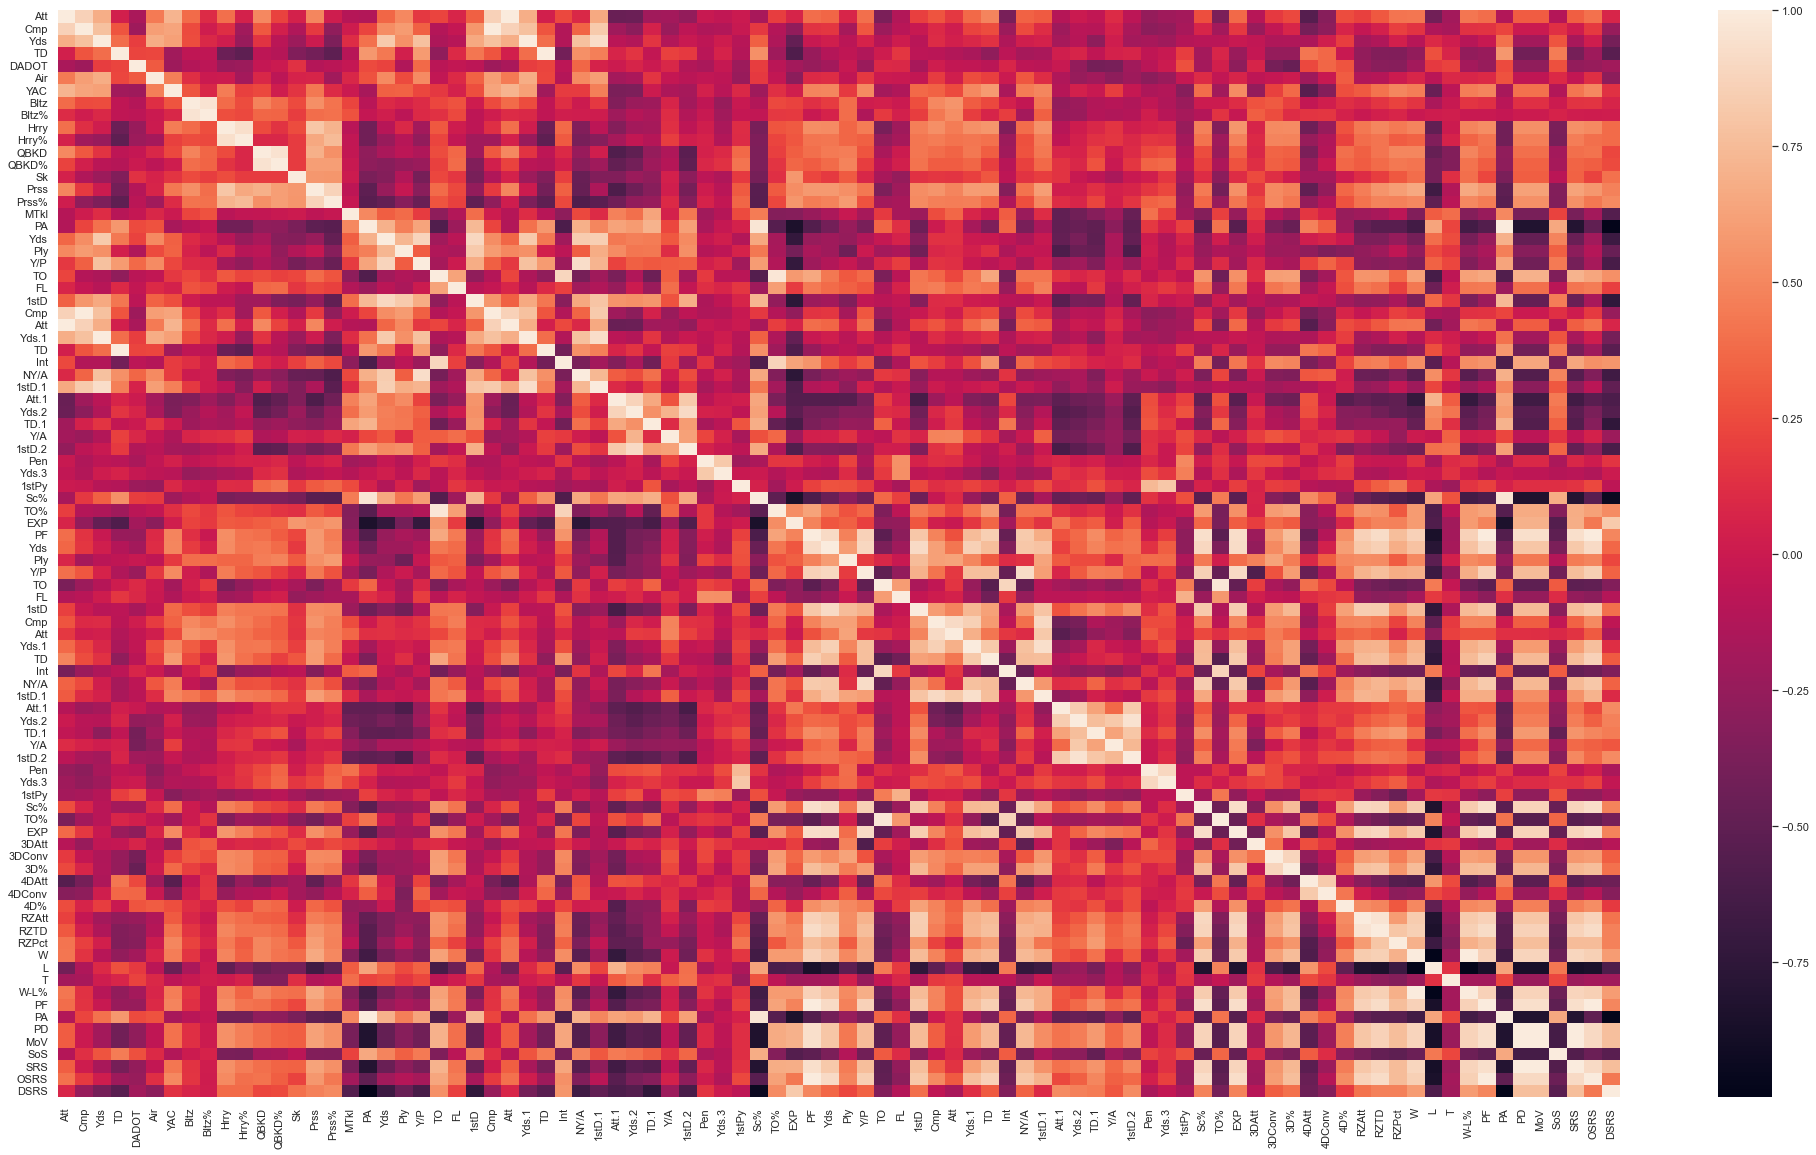

In [141]:
corr_matrix = complete_2021_stats.corr()

sn.set(rc={"figure.figsize":(35,20)})
sn.heatmap(corr_matrix)


